In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt

In [4]:
from sklearn.datasets import make_regression

In [14]:
X, y = X,y = make_regression(n_samples=200, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

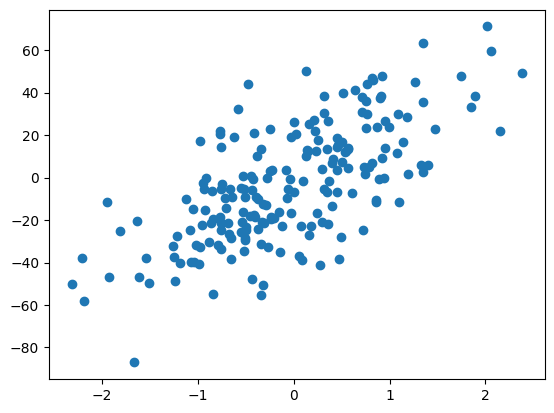

In [15]:
plt.scatter(X,y)

In [16]:


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)



In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 1)
(40, 1)
(160,)
(40,)


### using scikit-learn 

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()


In [20]:


lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
print(lr.coef_)
print(lr.intercept_)

[22.06242048]
-1.5371221448786188


In [22]:
y_pred = lr.predict(X_test)

In [23]:
from sklearn.metrics import r2_score

In [24]:
r2_score(y_test,y_pred)

0.3408760637280518

### Gradient Descent from scratch

In [30]:
class GradientDescentRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,"  ",self.b)
        
    def predict(self,X):
        return self.m * X + self.b
    

In [31]:
gd = GradientDescentRegressor(0.001,50)

In [32]:
gd.fit(X_train,y_train)

22.062462812634006    -1.5371201791848785


In [33]:
y_pred = gd.predict(X_test)

In [34]:
r2_score(y_test,y_pred)

0.3408757628113699